# This code represents an implementation of the GreedyKCenters Algorithm without using libraries that would give us the cluster centers directly

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
def read_df( path ):
    return pd.read_csv( path, header = None )

def get_index( temp_df, C ):
    #Get the min euclidean distance of each row in temp_df from all centers in C
    distanceVector = np.amin( euclidean_distances( temp_df, C ), axis=1 )
    
    #Return the index of the row having maximum minimum euclidean distance
    return np.argmax(distanceVector)

In [3]:
def greedy_kcenters( path, k ):
    
    #Reading the file
    df = read_df( path )
    #Create copy of original dataframe
    temp_df = df.copy()
    
    #Initialize the first center
    C = df.sample( 1 )
    
    #Remove this sample from df so that it does not come in further calculations
    temp_df.drop(C.index,inplace = True)
    #and change indices to 0,1,2,...,n-1
    temp_df.index = list( range( temp_df.shape[0] ) )
    
    while C.shape[0] < k:
        
        #Get index of data point that has maximum minimum distance from any center
        ind = get_index( temp_df, C )
        
        #Append data in temp_df at index ind into C
        C = C.append( temp_df.loc[ind] )
        
        #Remove that row from temp_df
        temp_df.drop(ind,inplace = True)
        #and change indices to 0,1,2,...,n-1
        temp_df.index = list( range( temp_df.shape[0] ) )
    
    #Delete temp_df so that it does not take space
    del temp_df
    
    #Return centers and final objective function value
    return( C, np.amax(np.amin(euclidean_distances( df, C ), axis=1 )) )

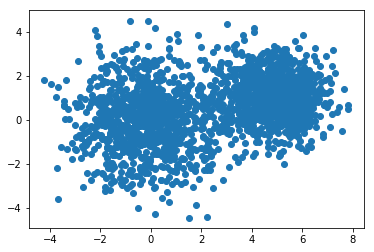

In [4]:
trial_df = pd.read_csv("clustering.csv", header=None)
plt.scatter(trial_df[0],trial_df[1])
plt.show()

In [6]:
centers, obj_value = greedy_kcenters( "clustering.csv", 2 )

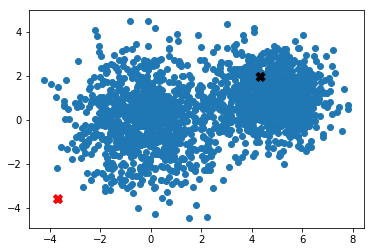

In [7]:
plt.scatter(trial_df[0], trial_df[1])
plt.scatter(centers[0],centers[1], marker = "X", color = ['black', 'red'], s =80)
plt.show()

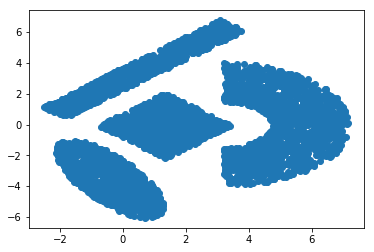

In [8]:
trial_df = pd.read_csv("ShapedData.csv", header=None)
plt.scatter(trial_df[0],trial_df[1])
plt.show()

In [9]:
centers, obj_value = greedy_kcenters( "ShapedData.csv", 4 )

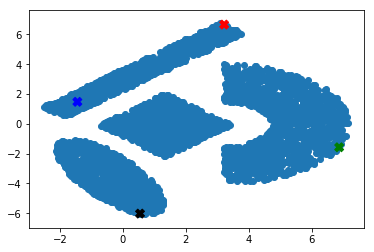

In [10]:
norm = plt.Normalize()
plt.scatter(trial_df[0], trial_df[1])
plt.scatter(centers[0],centers[1], marker = "X", color = ['blue', 'green','black','red'], s =80)
plt.show()